## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
from tensorflow import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape,output_nuit=10,num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i==0:
            x = keras.layers.Dense(units=n_units,activation="relu",name="hidden"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,activation="relu",name="hidden"+str(i+1))(x)
    out =  keras.layers.Dense(units=output_nuit,activation="softmax",name="out")(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    
    
    return model

In [6]:
LEARNING_RATE = [1e-1,1e-2,1e-3,1e-4,1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.85

In [7]:
results = {}

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
hidden2 (Dense)              (None, 256)               131328    
_________________________________________________________________
hidden3 (Dense)              (None, 128)               32896     
_________________________________________________________________
out (Dense)                  (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


C:\Users\loe_lin\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
196/196 [==============================] - 3s 12ms/step - loss: 2.1302 - accuracy: 0.2186 - val_loss: 2.0344 - val_accuracy: 0.2641
Epoch 2/50
196/196 [==============================] - 2s 12ms/step - loss: 1.8797 - accuracy: 0.3204 - val_loss: 1.7873 - val_accuracy: 0.3560
Epoch 3/50
196/196 [==============================] - 2s 12ms/step - loss: 1.7484 - accuracy: 0.3701 - val_loss: 1.7259 - val_accuracy: 0.3816
Epoch 4/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6881 - accuracy: 0.3929 - val_loss: 1.7139 - val_accuracy: 0.3831
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6389 - accuracy: 0.4134 - val_loss: 1.6508 - val_accuracy: 0.4078
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6133 - accuracy: 0.4233 - val_loss: 1.7967 - val_accuracy: 0.3649
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 1.5778 - accuracy: 0.4323 - val_loss: 1.7199 - val_accuracy: 0.4020

Epoch 1/50
196/196 [==============================] - 3s 12ms/step - loss: 1.8916 - accuracy: 0.3242 - val_loss: 1.7535 - val_accuracy: 0.3708
Epoch 2/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6869 - accuracy: 0.4042 - val_loss: 1.6837 - val_accuracy: 0.4090
Epoch 3/50
196/196 [==============================] - 2s 11ms/step - loss: 1.5991 - accuracy: 0.4354 - val_loss: 1.7256 - val_accuracy: 0.3878
Epoch 4/50
196/196 [==============================] - 2s 11ms/step - loss: 1.5393 - accuracy: 0.4569 - val_loss: 1.5635 - val_accuracy: 0.4449
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4858 - accuracy: 0.4761 - val_loss: 1.5088 - val_accuracy: 0.4620
Epoch 6/50
196/196 [==============================] - 2s 12ms/step - loss: 1.4461 - accuracy: 0.4890 - val_loss: 1.4926 - val_accuracy: 0.4704
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4096 - accuracy: 0.4987 - val_loss: 1.6479 - val_accuracy: 0.4135

Epoch 1/50
196/196 [==============================] - 3s 12ms/step - loss: 2.1398 - accuracy: 0.2469 - val_loss: 2.0081 - val_accuracy: 0.3070
Epoch 2/50
196/196 [==============================] - 2s 11ms/step - loss: 1.9417 - accuracy: 0.3283 - val_loss: 1.8884 - val_accuracy: 0.3409
Epoch 3/50
196/196 [==============================] - 2s 11ms/step - loss: 1.8608 - accuracy: 0.3523 - val_loss: 1.8331 - val_accuracy: 0.3606
Epoch 4/50
196/196 [==============================] - 2s 11ms/step - loss: 1.8139 - accuracy: 0.3683 - val_loss: 1.7928 - val_accuracy: 0.3769
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 1.7789 - accuracy: 0.3816 - val_loss: 1.7621 - val_accuracy: 0.3870
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 1.7491 - accuracy: 0.3891 - val_loss: 1.7410 - val_accuracy: 0.3901
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 1.7229 - accuracy: 0.3996 - val_loss: 1.7093 - val_accuracy: 0.4042

Epoch 1/50
196/196 [==============================] - 2s 11ms/step - loss: 2.2942 - accuracy: 0.1527 - val_loss: 2.2500 - val_accuracy: 0.1661
Epoch 2/50
196/196 [==============================] - 2s 11ms/step - loss: 2.2243 - accuracy: 0.1912 - val_loss: 2.2026 - val_accuracy: 0.2110
Epoch 3/50
196/196 [==============================] - 2s 11ms/step - loss: 2.1797 - accuracy: 0.2291 - val_loss: 2.1599 - val_accuracy: 0.2398
Epoch 4/50
196/196 [==============================] - 2s 11ms/step - loss: 2.1389 - accuracy: 0.2496 - val_loss: 2.1215 - val_accuracy: 0.2580
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 2.1032 - accuracy: 0.2643 - val_loss: 2.0881 - val_accuracy: 0.2681
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 2.0717 - accuracy: 0.2765 - val_loss: 2.0587 - val_accuracy: 0.2778
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 2.0445 - accuracy: 0.2852 - val_loss: 2.0330 - val_accuracy: 0.2926

Epoch 1/50
196/196 [==============================] - 3s 16ms/step - loss: 2.3862 - accuracy: 0.0980 - val_loss: 2.3547 - val_accuracy: 0.0975
Epoch 2/50
196/196 [==============================] - 3s 13ms/step - loss: 2.3355 - accuracy: 0.0992 - val_loss: 2.3230 - val_accuracy: 0.1031
Epoch 3/50
196/196 [==============================] - 3s 13ms/step - loss: 2.3124 - accuracy: 0.1021 - val_loss: 2.3058 - val_accuracy: 0.1046
Epoch 4/50
196/196 [==============================] - 2s 13ms/step - loss: 2.2984 - accuracy: 0.1068 - val_loss: 2.2943 - val_accuracy: 0.1080
Epoch 5/50
196/196 [==============================] - 2s 12ms/step - loss: 2.2886 - accuracy: 0.1132 - val_loss: 2.2857 - val_accuracy: 0.1127
Epoch 6/50
196/196 [==============================] - 3s 13ms/step - loss: 2.2810 - accuracy: 0.1201 - val_loss: 2.2787 - val_accuracy: 0.1191
Epoch 7/50
196/196 [==============================] - 3s 14ms/step - loss: 2.2745 - accuracy: 0.1281 - val_loss: 2.2726 - val_accuracy: 0.1314

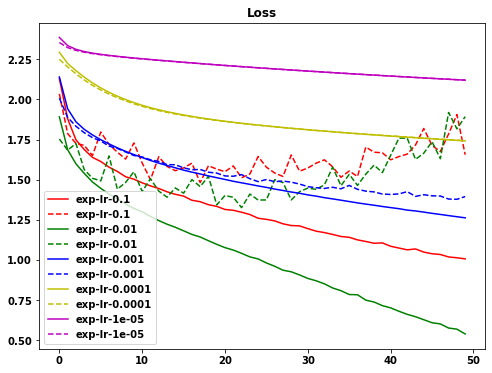

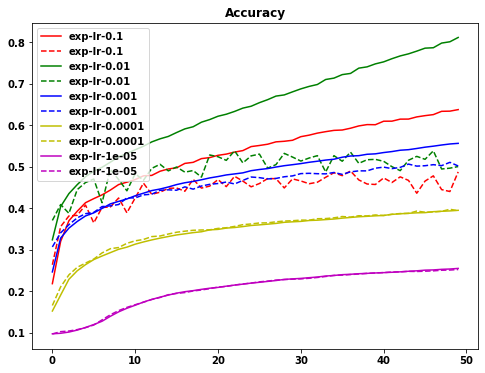

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()